In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# check current directory
%pwd 

'C:\\Users\\Haiyan\\Google Drive\\DataScience\\Python\\Data_Scientist_Nanodegree\\1_Project1_Airbnb'

In [3]:
# set working directory
%cd "C:\Users\Haiyan\Google Drive\DataScience\Python\Data_Scientist_Nanodegree\1_Project1_Airbnb"

C:\Users\Haiyan\Google Drive\DataScience\Python\Data_Scientist_Nanodegree\1_Project1_Airbnb


In [4]:
# read datasets
data = pd.read_csv('seattle\listings.csv')

In [5]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
data.shape

(3818, 92)

In [12]:
data['square_feet'].dropna().count()

97

In [41]:
reviews = data[['id', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'accommodates', 
      'price', 'weekly_price', 'monthly_price', 
      'number_of_reviews', 'review_scores_rating', 'review_scores_value', 'reviews_per_month',
      'host_since', 'host_location']].sort_values(['id','room_type'])

In [42]:
reviews.describe()

,id,accommodates,number_of_reviews,review_scores_rating,review_scores_value,reviews_per_month
count,3.818000e+03,3818.000000,3818.000000,3171.000000,3162.000000,3191.000000
mean,5.550111e+06,3.349398,22.223415,94.539262,9.452245,2.078919
std,2.962660e+06,1.977599,37.730892,6.606083,0.750259,1.822348
min,3.335000e+03,1.000000,0.000000,20.000000,2.000000,0.020000
25%,3.258256e+06,2.000000,2.000000,93.000000,9.000000,0.695000
50%,6.118244e+06,3.000000,9.000000,96.000000,10.000000,1.540000
75%,8.035127e+06,4.000000,26.000000,99.000000,10.000000,3.000000
max,1.034016e+07,16.000000,474.000000,100.000000,10.000000,12.150000


In [39]:
data['id'].drop_duplicates().count()

3818

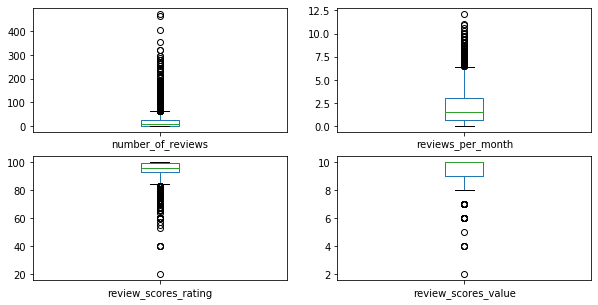

In [68]:
fig = plt.figure(figsize = (10, 5))

plt.subplot(2, 2, 1)
data['number_of_reviews'].plot(kind = 'box');

plt.subplot(2, 2, 2)
data['reviews_per_month'].plot(kind = 'box');

plt.subplot(2, 2, 3)
data['review_scores_rating'].plot(kind = 'box'); 

plt.subplot(2, 2, 4)
data['review_scores_value'].plot(kind = 'box');

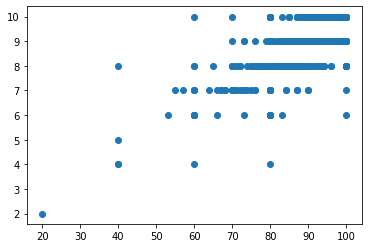

In [71]:
plt.scatter(x= data['review_scores_rating'], y = data['review_scores_value']);

In [79]:
data['neighbourhood_group_cleansed']

0                Queen Anne
1                Queen Anne
2                Queen Anne
3                Queen Anne
4                Queen Anne
5                Queen Anne
6                Queen Anne
7                Queen Anne
8                Queen Anne
9                Queen Anne
10               Queen Anne
11               Queen Anne
12               Queen Anne
13               Queen Anne
14               Queen Anne
15               Queen Anne
16               Queen Anne
17               Queen Anne
18               Queen Anne
19               Queen Anne
20               Queen Anne
21               Queen Anne
22               Queen Anne
23               Queen Anne
24               Queen Anne
25               Queen Anne
26               Queen Anne
27               Queen Anne
28               Queen Anne
29               Queen Anne
               ...         
3788    Other neighborhoods
3789    Other neighborhoods
3790    Other neighborhoods
3791    Other neighborhoods
3792    Other neighb

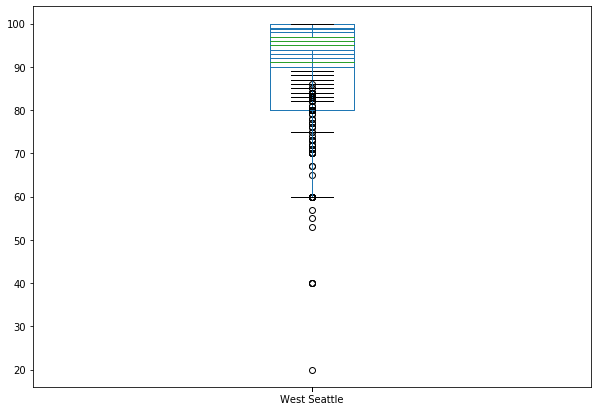

In [99]:
# reviews_grouped = reviews.groupby('neighbourhood_group_cleansed').unstack();
# reviews_grouped.head()

fig, ax = plt.subplots(figsize=(10,7))
reviews.groupby('neighbourhood_group_cleansed')['review_scores_rating'].plot(kind = 'box', ax = plt.gca());


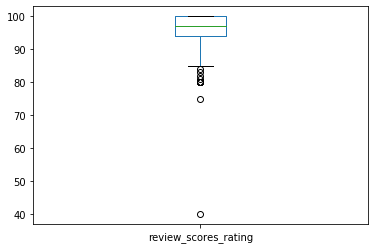

In [92]:
reviews[reviews['neighbourhood_group_cleansed'] == 'Queen Anne']['review_scores_rating'].plot(kind = 'box')

TypeError: unhashable type: 'numpy.ndarray'

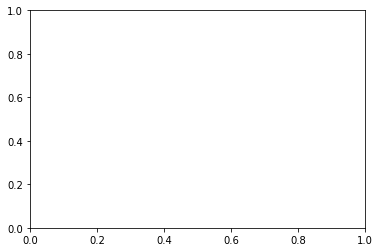

In [82]:
plt.scatter(x = reviews_grouped['review_scores_rating'], y = reviews_grouped['review_scores_value']);


In [7]:
data.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',
